In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('STB.csv')
df=df.reset_index()['Price']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 3s 88ms/step - loss: 0.0098 - val_loss: 0.2691
Epoch 2/100
9/9 [==============================] - 0s 35ms/step - loss: 0.0017 - val_loss: 0.2146
Epoch 3/100
9/9 [==============================] - 0s 38ms/step - loss: 6.8877e-04 - val_loss: 0.1650
Epoch 4/100
9/9 [==============================] - 0s 37ms/step - loss: 4.9975e-04 - val_loss: 0.1569
Epoch 5/100
9/9 [==============================] - 0s 37ms/step - loss: 3.9189e-04 - val_loss: 0.1367
Epoch 6/100
9/9 [==============================] - 0s 36ms/step - loss: 3.6425e-04 - val_loss: 0.1235
Epoch 7/100
9/9 [==============================] - 0s 37ms/step - loss: 3.3947e-04 - val_loss: 0.1145
Epoch 8/100
9/9 [==============================] - 0s 36ms/step - loss: 3.3269e-04 - val_loss: 0.1091
Epoch 9/100
9/9 [==============================] - 0s 36ms/step - loss: 3.0944e-04 - val_loss: 0.0989
Epoch 10/100
9/9 [==============================] - 0s 38ms/step - loss: 2.9264e-04 - val_

9/9 [==============================] - 0s 36ms/step - loss: 1.0310e-04 - val_loss: 0.0168
Epoch 81/100
9/9 [==============================] - 0s 35ms/step - loss: 1.0300e-04 - val_loss: 0.0177
Epoch 82/100
9/9 [==============================] - 0s 36ms/step - loss: 9.9807e-05 - val_loss: 0.0156
Epoch 83/100
9/9 [==============================] - 0s 37ms/step - loss: 1.0364e-04 - val_loss: 0.0165
Epoch 84/100
9/9 [==============================] - 0s 35ms/step - loss: 1.0570e-04 - val_loss: 0.0189
Epoch 85/100
9/9 [==============================] - 0s 35ms/step - loss: 1.0503e-04 - val_loss: 0.0189
Epoch 86/100
9/9 [==============================] - 0s 35ms/step - loss: 9.7805e-05 - val_loss: 0.0164
Epoch 87/100
9/9 [==============================] - 0s 35ms/step - loss: 9.6747e-05 - val_loss: 0.0169
Epoch 88/100
9/9 [==============================] - 0s 35ms/step - loss: 9.6867e-05 - val_loss: 0.0179
Epoch 89/100
9/9 [==============================] - 0s 39ms/step - loss: 1.1000e-04 - 

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

5/5 [==============================] - 0s 8ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [12]:
train_size1 = int(0.5 * len(df))
test_size1 = int(0.3 * len(df))

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1)

In [13]:
# 12. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val1)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test1)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_val1 - y_pred_val) / y_val1)) * 100
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val1))
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 4614.272983295423
Testing RMSE: 6051.037585959676
Validation MAPE: 16.56528276605325
Testing MAPE: 21.789328953992165
Validation MAE: 3636.286245409213
Testing MAE: 5022.787999646


In [14]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[len(val_data)-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=99
i=0
while(i<30):

    if(len(temp_input)>99):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.56917688 0.56392294 0.56742557 0.51138354 0.5323993  0.54640981
 0.52714536 0.5323993  0.56742557 0.56042032 0.59194396 0.59544658
 0.60770578 0.61821366 0.60945709 0.61821366 0.63047285 0.63747811
 0.67425569 0.68301226 0.68301226 0.67775832 0.6497373  0.69352014
 0.64273205 0.66024518 0.65674256 0.64448336 0.64623468 0.61996497
 0.60070053 0.57267951 0.60245184 0.59894921 0.56217163 0.58143608
 0.59894921 0.64448336 0.63222417 0.60945709 0.61996497 0.59544658
 0.5709282  0.57618214 0.63397548 0.64098074 0.61996497 0.61646235
 0.61996497 0.63222417 0.67250438 0.65499124 0.61996497 0.59894921
 0.63222417 0.60595447 0.62171629 0.59194396 0.60595447 0.61295972
 0.61996497 0.62171629 0.63747811 0.63397548 0.63222417 0.65499124
 0.6619965  0.68126095 0.68651489 0.66374781 0.64273205 0.65499124
 0.65323993 0.65323993 0.65849387 0.67075306 0.64448336 0.65148862
 0.65148862 0.63747811 0.64448336 0.64098074 0.63922942 0.62171629
 0.63397548 0.62521891 0.63047285 0.62521891 0.618

7 day output [[0.4190398]]
8 day input [0.56742557 0.56042032 0.59194396 0.59544658 0.60770578 0.61821366
 0.60945709 0.61821366 0.63047285 0.63747811 0.67425569 0.68301226
 0.68301226 0.67775832 0.6497373  0.69352014 0.64273205 0.66024518
 0.65674256 0.64448336 0.64623468 0.61996497 0.60070053 0.57267951
 0.60245184 0.59894921 0.56217163 0.58143608 0.59894921 0.64448336
 0.63222417 0.60945709 0.61996497 0.59544658 0.5709282  0.57618214
 0.63397548 0.64098074 0.61996497 0.61646235 0.61996497 0.63222417
 0.67250438 0.65499124 0.61996497 0.59894921 0.63222417 0.60595447
 0.62171629 0.59194396 0.60595447 0.61295972 0.61996497 0.62171629
 0.63747811 0.63397548 0.63222417 0.65499124 0.6619965  0.68126095
 0.68651489 0.66374781 0.64273205 0.65499124 0.65323993 0.65323993
 0.65849387 0.67075306 0.64448336 0.65148862 0.65148862 0.63747811
 0.64448336 0.64098074 0.63922942 0.62171629 0.63397548 0.62521891
 0.63047285 0.62521891 0.61821366 0.64273205 0.64623468 0.66725044
 0.66900175 0.68301226 

16 day output [[0.3157507]]
17 day input [0.63747811 0.67425569 0.68301226 0.68301226 0.67775832 0.6497373
 0.69352014 0.64273205 0.66024518 0.65674256 0.64448336 0.64623468
 0.61996497 0.60070053 0.57267951 0.60245184 0.59894921 0.56217163
 0.58143608 0.59894921 0.64448336 0.63222417 0.60945709 0.61996497
 0.59544658 0.5709282  0.57618214 0.63397548 0.64098074 0.61996497
 0.61646235 0.61996497 0.63222417 0.67250438 0.65499124 0.61996497
 0.59894921 0.63222417 0.60595447 0.62171629 0.59194396 0.60595447
 0.61295972 0.61996497 0.62171629 0.63747811 0.63397548 0.63222417
 0.65499124 0.6619965  0.68126095 0.68651489 0.66374781 0.64273205
 0.65499124 0.65323993 0.65323993 0.65849387 0.67075306 0.64448336
 0.65148862 0.65148862 0.63747811 0.64448336 0.64098074 0.63922942
 0.62171629 0.63397548 0.62521891 0.63047285 0.62521891 0.61821366
 0.64273205 0.64623468 0.66725044 0.66900175 0.68301226 0.69001751
 0.70402802 0.69001751 0.69702277 0.71978984 0.62433457 0.60868073
 0.54630244 0.52953172

24 day output [[0.3120408]]
25 day input [0.66024518 0.65674256 0.64448336 0.64623468 0.61996497 0.60070053
 0.57267951 0.60245184 0.59894921 0.56217163 0.58143608 0.59894921
 0.64448336 0.63222417 0.60945709 0.61996497 0.59544658 0.5709282
 0.57618214 0.63397548 0.64098074 0.61996497 0.61646235 0.61996497
 0.63222417 0.67250438 0.65499124 0.61996497 0.59894921 0.63222417
 0.60595447 0.62171629 0.59194396 0.60595447 0.61295972 0.61996497
 0.62171629 0.63747811 0.63397548 0.63222417 0.65499124 0.6619965
 0.68126095 0.68651489 0.66374781 0.64273205 0.65499124 0.65323993
 0.65323993 0.65849387 0.67075306 0.64448336 0.65148862 0.65148862
 0.63747811 0.64448336 0.64098074 0.63922942 0.62171629 0.63397548
 0.62521891 0.63047285 0.62521891 0.61821366 0.64273205 0.64623468
 0.66725044 0.66900175 0.68301226 0.69001751 0.70402802 0.69001751
 0.69702277 0.71978984 0.62433457 0.60868073 0.54630244 0.52953172
 0.47650245 0.46896243 0.4287512  0.41903979 0.3860679  0.38148642
 0.35706171 0.34998113 

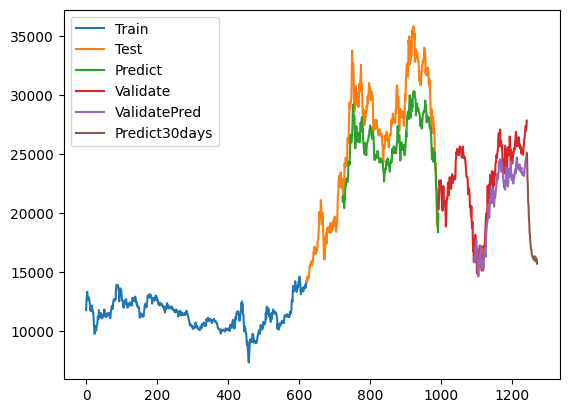

In [15]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()